In [95]:
# Qua è dove andrò ad eseguire il codice per fare un po' di data visualization

In [96]:
import pandas as pd

In [97]:
import glob
all_folders=glob.glob('../A_DeviceMotion_data/*', recursive=True)
complete_df=pd.DataFrame()
class_dict={"dws":"downstairs", "jog": "jogging", "sit":"sit", "std":"standing", "ups":"upstairs", "wlk":"walking"}
for folder in all_folders:
    all_files=glob.glob(folder+"/*", recursive=True)
    class_name=folder.split('\\')[1].split('_')[0]
    for file in all_files:
        df=pd.read_csv(file, index_col=0)
        df["class"]=class_dict[class_name]
        complete_df=pd.concat([complete_df, df], ignore_index=True)
complete_df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,class
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,downstairs
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,downstairs
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,downstairs
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,downstairs
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,0.890518,-1.300928,0.089878,0.207249,0.963806,-0.167690,-0.920226,0.406762,-0.383194,0.044079,-0.204574,0.204906,walking
1412861,0.929499,-1.319499,0.124063,0.199247,0.968591,-0.148750,-0.923594,0.231559,-0.521862,0.066348,-0.222604,0.225136,walking
1412862,0.966103,-1.340284,0.159858,0.187951,0.973550,-0.129883,-0.970054,0.003083,-0.621238,-0.005959,-0.054040,0.240632,walking
1412863,1.005158,-1.362495,0.201540,0.174576,0.978384,-0.110827,-1.005371,-0.108297,-0.708937,-0.007767,-0.003927,0.194735,walking


Text(0.5, 1.0, 'Classes distribution')

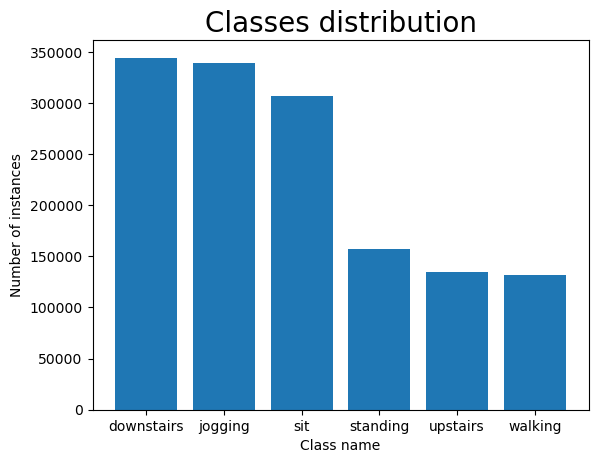

In [98]:
from matplotlib import pyplot as plt
classes=complete_df["class"].unique()
value_count=complete_df["class"].value_counts()
plt.bar(classes, value_count)
plt.xlabel("Class name")
plt.ylabel("Number of instances")
plt.title("Classes distribution", fontsize=20)

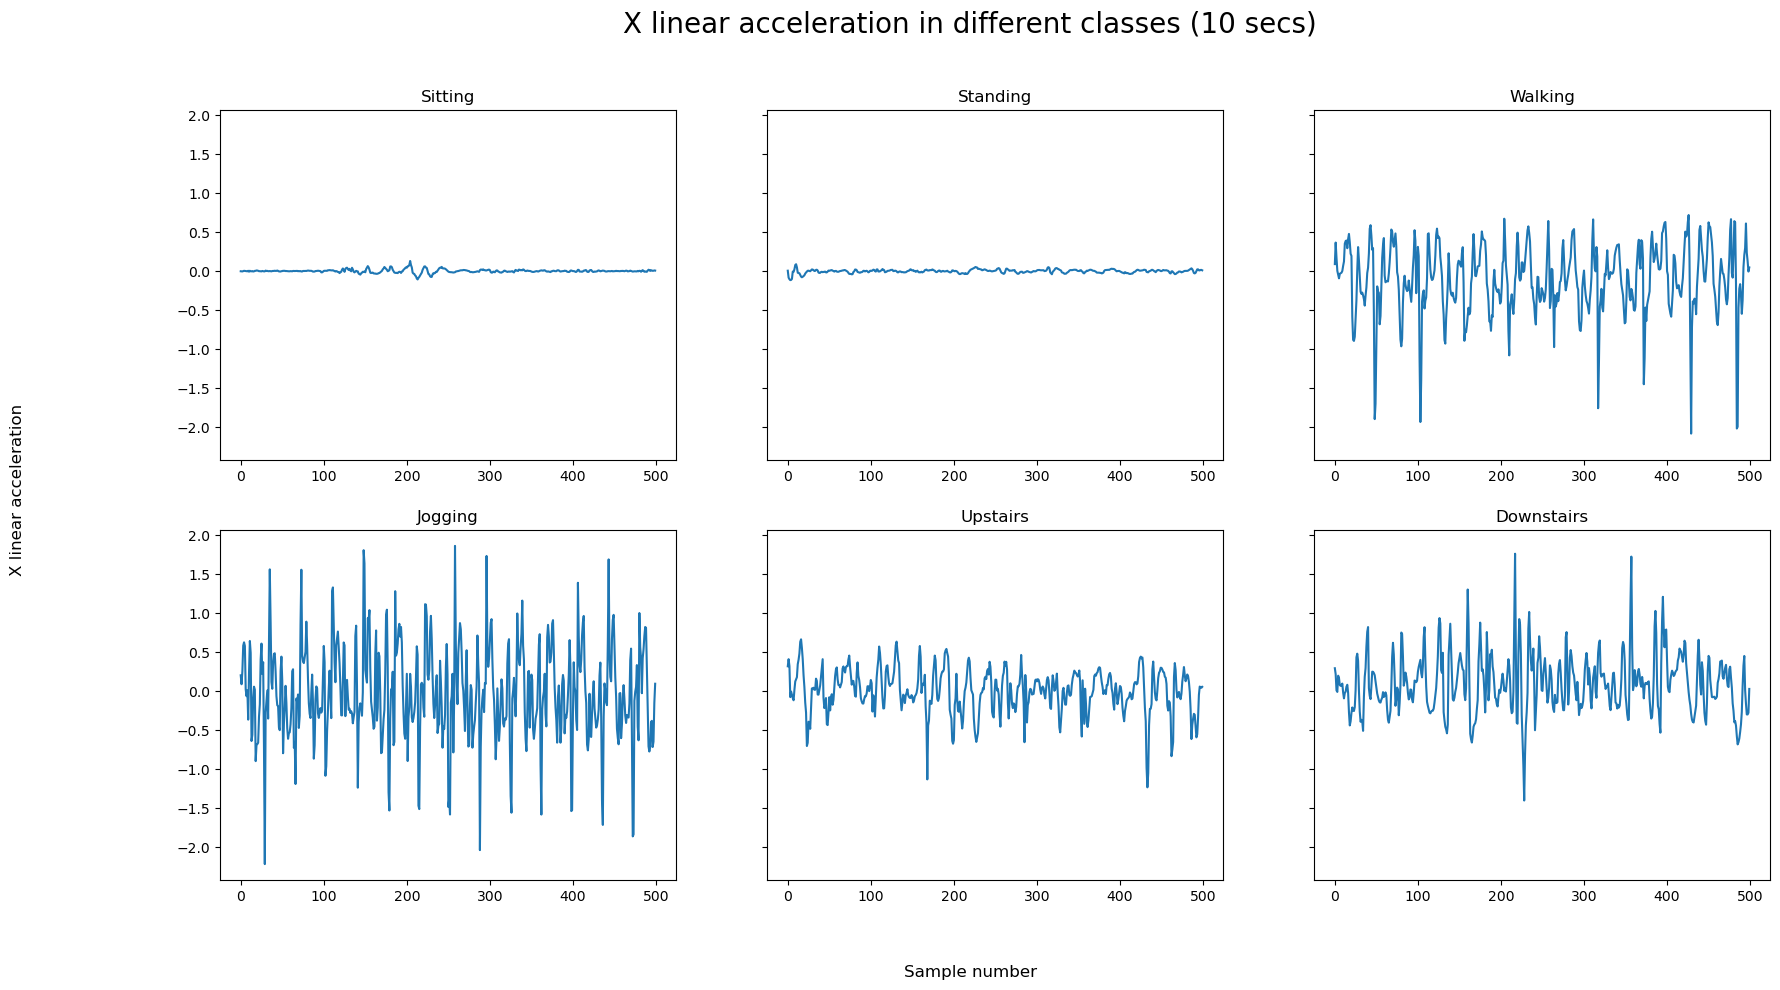

In [99]:
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
sitting_df=pd.read_csv("../A_DeviceMotion_data/sit_5/sub_1.csv")["userAcceleration.x"][0:500]
standing_df=pd.read_csv("../A_DeviceMotion_data/std_6/sub_1.csv")["userAcceleration.x"][0:500]
walking_df=pd.read_csv("../A_DeviceMotion_data/wlk_7/sub_1.csv")["userAcceleration.x"][0:500]
jogging_df=pd.read_csv("../A_DeviceMotion_data/jog_9/sub_1.csv")["userAcceleration.x"][0:500]
upstairs_df=pd.read_csv("../A_DeviceMotion_data/ups_3/sub_1.csv")["userAcceleration.x"][0:500]
downstairs_df=pd.read_csv("../A_DeviceMotion_data/dws_1/sub_1.csv")["userAcceleration.x"][0:500]

f.suptitle("X linear acceleration in different classes (10 secs)", fontsize=20)
f.supxlabel("Sample number")
f.supylabel("X linear acceleration")
axes[0][0].plot(sitting_df)
axes[0][0].title.set_text("Sitting")
axes[0][1].plot(standing_df)
axes[0][1].title.set_text("Standing")
axes[0][2].plot(walking_df)
axes[0][2].title.set_text("Walking")
axes[1][0].plot(jogging_df)
axes[1][0].title.set_text("Jogging")
axes[1][1].plot(upstairs_df)
axes[1][1].title.set_text("Upstairs")
axes[1][2].plot(downstairs_df)
axes[1][2].title.set_text("Downstairs")

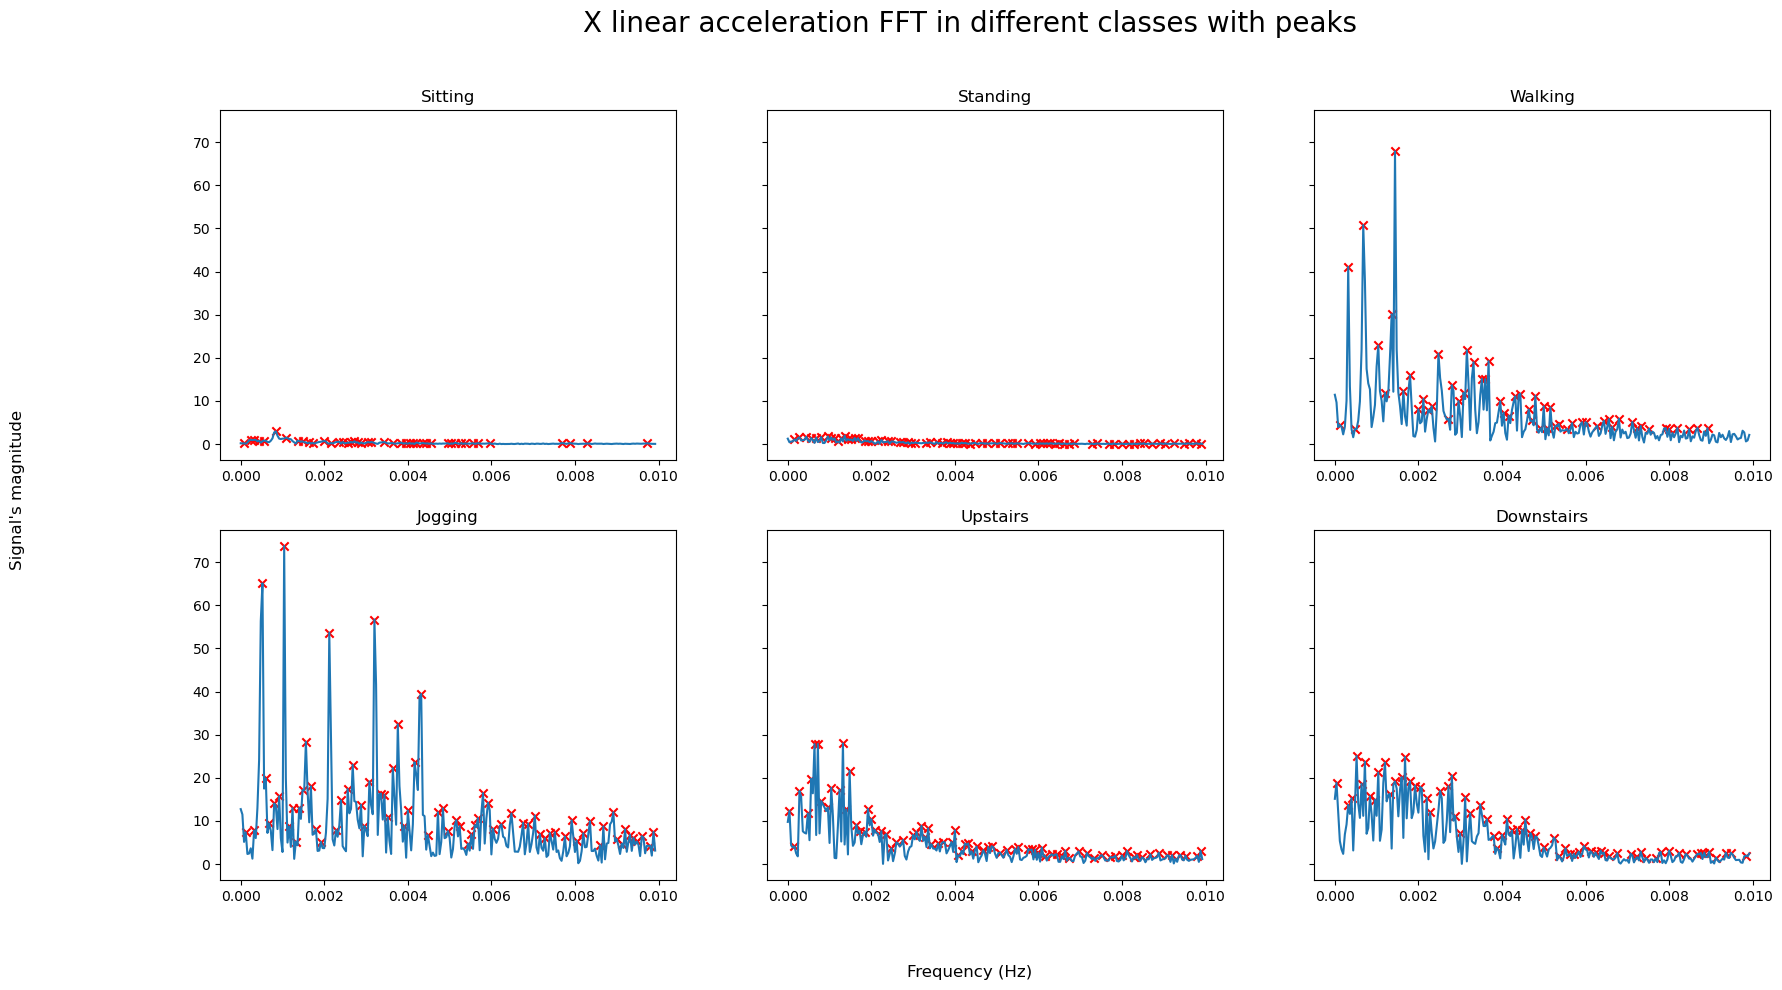

In [100]:
import detecta
from numpy.fft import fft
import numpy as np
N=500
n=np.arange(-1,N)
sr=1/50
T=N/sr
freq=n/T
c=20

# FFT computing
n_oneside=N//2
x=freq[1:n_oneside]
y_sit=np.abs(fft(sitting_df)[1:n_oneside])
y_std=np.abs(fft(standing_df)[1:n_oneside])
y_wlk=np.abs(fft(walking_df)[1:n_oneside])
y_jog=np.abs(fft(jogging_df)[1:n_oneside])
y_ups=np.abs(fft(upstairs_df)[1:n_oneside])
y_dwn=np.abs(fft(downstairs_df)[1:n_oneside])

# PEAKS computing
p_x_sit=detecta.detect_peaks(y_sit, mph=np.amax(y_sit)/c)
p_x_std=detecta.detect_peaks(y_std, mph=np.amax(y_std)/c)
p_x_wlk=detecta.detect_peaks(y_wlk, mph=np.amax(y_wlk)/c)
p_x_jog=detecta.detect_peaks(y_jog, mph=np.amax(y_jog)/c)
p_x_ups=detecta.detect_peaks(y_ups, mph=np.amax(y_ups)/c)
p_x_dwn=detecta.detect_peaks(y_dwn, mph=np.amax(y_dwn)/c)

#PLOT
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
f.suptitle("X linear acceleration FFT in different classes with peaks", fontsize=20)
f.supxlabel("Frequency (Hz)")
f.supylabel("Signal's magnitude")
axes[0][0].plot(x,y_sit)
axes[0][0].scatter(p_x_sit/T, y_sit[p_x_sit], marker="x", c="red")
axes[0][0].title.set_text("Sitting")
axes[0][1].plot(x,y_std)
axes[0][1].scatter(p_x_std/T, y_std[p_x_std], marker="x", c="red")
axes[0][1].title.set_text("Standing")
axes[0][2].plot(x,y_wlk)
axes[0][2].scatter(p_x_wlk/T, y_wlk[p_x_wlk], marker="x", c="red")
axes[0][2].title.set_text("Walking")
axes[1][0].plot(x,y_jog)
axes[1][0].scatter(p_x_jog/T, y_jog[p_x_jog], marker="x", c="red")
axes[1][0].title.set_text("Jogging")
axes[1][1].plot(x,y_ups)
axes[1][1].scatter(p_x_ups/T, y_ups[p_x_ups], marker="x", c="red")
axes[1][1].title.set_text("Upstairs")
axes[1][2].plot(x,y_dwn)
axes[1][2].scatter(p_x_dwn/T, y_dwn[p_x_dwn], marker="x", c="red")
axes[1][2].title.set_text("Downstairs")